**Notebook to download and make some basic analysis of line data from the public releases of the ALMA-IMF Large Program**\
Line data releases are hosted by Harvard's Dataverse service:\
https://dataverse.harvard.edu/dataverse/alma-imf 

In [46]:
from os import path
import numpy as np
import astropy.units as u
import astropy.constants as cts
from astropy.io import fits
from spectral_cube import SpectralCube
import regions
from pyspeckit import Spectrum

In [17]:
data_path = '/home/roberto/ALMA_IMF/ionized_He/data'
file_C18O = path.join(data_path,'G012.80_B6_spw4_12M_spw4.JvM.image.pbcor.statcont.contsub.fits')
file_H41a = path.join(data_path,'G012.80_B3_spw1_12M_h41a.JvM.image.contsub.fits')
nu_C180 = 2.195603541e11*u.Hz
nu0_H41a = 92.03443400e9*u.Hz
nu0_He41a = 92.07193800e9*u.Hz
dV_He41a = -cts.c*(nu0_He41a - nu0_H41a)/nu0_H41a # dV_He41a = -122.165 km/s

In [3]:
'''
# Only needed if one wants to change the reference frequency in the header
data_path = '/home/roberto/ALMA_IMF/ionized_He/data'
cubefile = 'G012.80_B6_spw5_12M_spw5.JvM.image.pbcor.statcont.contsub.fits'
cube_path = os.path.join(data_path, cubefile)
fits.setval(cube_path, 'RESTFRQ', value=nu_Heplus[1].value, ext=0)
test = fits.getheader(cube_path)
print(test['RESTFRQ'])
''';

In [4]:
# Read in cube and print rest frequency
cube_C18O = SpectralCube.read(file_C18O)
cube_C18O.allow_huge_operations=True
print(cube_C18O.header['RESTFRQ'])
#shape = cube_C18O.shape
#print(shape)
print(cube_C18O)

219560000000.0
SpectralCube with shape=(959, 727, 736) and unit=Jy / beam:
 n_x:    736  type_x: RA---SIN  unit_x: deg    range:   273.535293 deg:  273.576069 deg
 n_y:    727  type_y: DEC--SIN  unit_y: deg    range:   -17.948379 deg:  -17.910063 deg
 n_s:    959  type_s: FREQ      unit_s: Hz     range: 219474487528.053 Hz:219591417100.800 Hz


In [5]:
help(cube_C18O)

Help on SpectralCube in module spectral_cube.spectral_cube object:

class SpectralCube(BaseSpectralCube, spectral_cube.base_class.BeamMixinClass)
 |  SpectralCube(*args, **kwargs)
 |  
 |  Method resolution order:
 |      SpectralCube
 |      BaseSpectralCube
 |      spectral_cube.base_class.BaseNDClass
 |      spectral_cube.base_class.MaskableArrayMixinClass
 |      spectral_cube.base_class.SpectralAxisMixinClass
 |      spectral_cube.base_class.SpatialCoordMixinClass
 |      spectral_cube.base_class.HeaderMixinClass
 |      spectral_cube.base_class.BeamMixinClass
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, wcs, mask=None, meta=None, fill_value=nan, header=None, allow_huge_operations=False, beam=None, wcs_tolerance=0.0, use_dask=False, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  with_beam(self, beam, raise_error_jybm=True)
 |      Attach a beam object to the `~SpectralCube`.
 |      
 |      Paramet

INFO: Auto-setting vmin to -7.837e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.013e+00 [aplpy.core]


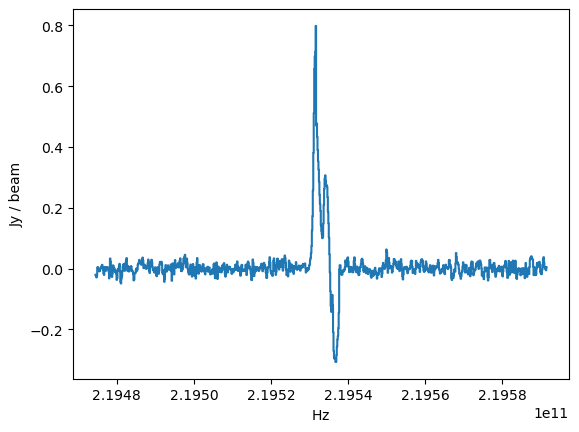

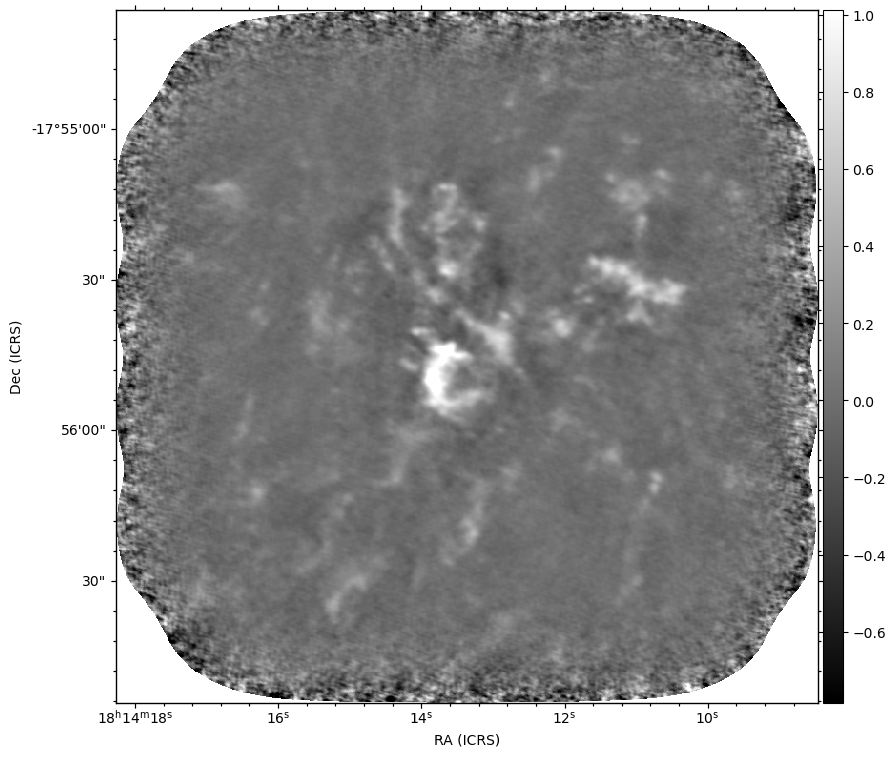

In [6]:
# Let's make a quick look at one spectrum and one slice of the data
cube_C18O[:,365,365].quicklook()
spectrum = cube_C18O[:,365,365]
sp_peak = spectrum.argmax()
cube_C18O[sp_peak,:,:].quicklook()

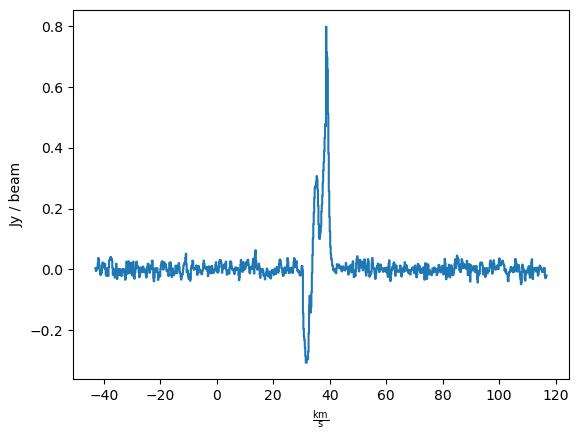

In [7]:
# Sometimes it's more useful to plot spectra in velocity units
cube_C18O = cube_C18O.with_spectral_unit(u.km / u.s, velocity_convention='radio')
cube_C18O[:,365,365].quicklook()

In [8]:
# Also, it is often better to work with only a cutout of the cube
# In this example we define a CRTF region as a string. One can also use DS9 regions or region files. 
ra_center = cube_C18O.header['CRVAL1']
dec_center = cube_C18O.header['CRVAL2']
crop_size = 30/3600 #deg
region_str = f"icrs; box {ra_center} {dec_center} {crop_size} {crop_size} 0"
subcube_C18O = cube_C18O.subcube_from_ds9region(region_str)  
subcube_C18O = subcube_C18O.spectral_slab(20 * u.km / u.s, 60 * u.km / u.s)  
#region_str = f"circle[[{ra_center}deg, {dec_center}deg], {crop_size}deg], coord=icrs, range=[20km/s, 60km/s]"
#sub_cube_C18O = cube_C18O.subcube_from_crtfregion(region_str)  
print(subcube_C18O)

SpectralCube with shape=(241, 157, 157) and unit=Jy / beam:
 n_x:    157  type_x: RA---SIN  unit_x: deg    range:   273.551381 deg:  273.560035 deg
 n_y:    157  type_y: DEC--SIN  unit_y: deg    range:   -17.933339 deg:  -17.925105 deg
 n_s:    241  type_s: VRAD      unit_s: km / s  range:       19.932 km / s:      59.930 km / s


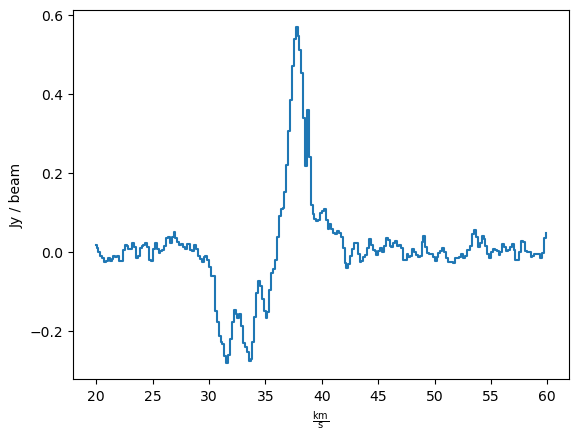

In [9]:
# Let's make a quick look at one spectrum and one slice of the data
subcube_C18O[:,68,68].quicklook()
spectrum = subcube_C18O[:,68,68]

[<WCSAxes: title={'center': '38.265 km / s'}>,
 <WCSAxes: title={'center': '38.431 km / s'}>,
 <WCSAxes: title={'center': '38.598 km / s'}>,
 <WCSAxes: title={'center': '38.765 km / s'}>,
 <WCSAxes: title={'center': '38.931 km / s'}>,
 <WCSAxes: title={'center': '39.098 km / s'}>,
 <WCSAxes: title={'center': '39.265 km / s'}>,
 <WCSAxes: title={'center': '39.431 km / s'}>,
 <WCSAxes: title={'center': '39.598 km / s'}>]

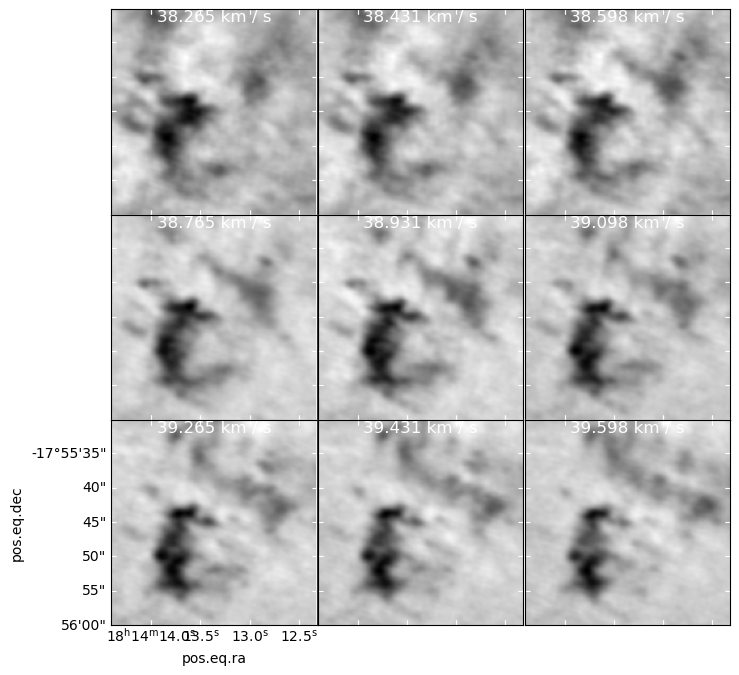

In [10]:
#help(subcube_C18O.plot_channel_maps)
subcube_C18O.plot_channel_maps(3, 3, list(range(110,119)))

INFO: Auto-setting vmin to -2.240e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.099e+00 [aplpy.core]


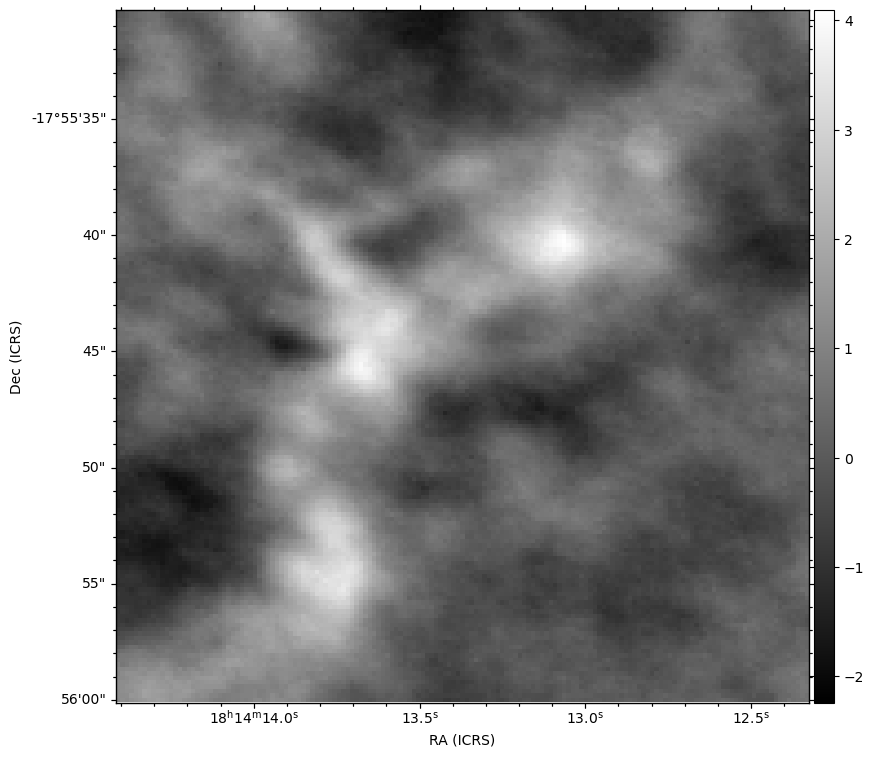

In [11]:
subcube_C18O.moment0(axis=0).quicklook()

In [12]:
cube_C18O.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3                                                  
NAXIS1  =                  736                                                  
NAXIS2  =                  727                                                  
NAXIS3  =                  959                                                  
BMAJ    = 0.000357780844564170                                                  
BMIN    = 0.000240793776933994                                                  
BPA     =    77.02640267494483                                                  
FILENAME= 'G012.80_B6_spw4_12M_spw4.JvM.image.pbcor.statcont.contsub.fits'      
BUNIT   = 'Jy beam-1'                                                           
SLICE   = '[[(0, 959, None), (42, 769, None), (38, 774, None)]]'                
BEAM    = 'Beam: BMAJ=1.2880

In [19]:
# Now we will work with the cube with the H41alpha and He41alpha recombination lines 
cube_H41a = SpectralCube.read(file_H41a)
cube_H41a.allow_huge_operations=True
cube_H41a = cube_H41a.with_spectral_unit(u.km / u.s, velocity_convention='radio')
print(cube_H41a.header['RESTFRQ'])
print(cube_H41a)

92034434000.0
SpectralCube with shape=(146, 749, 787):
 n_x:    787  type_x: RA---SIN  unit_x: deg    range:   273.524724 deg:  273.586693 deg
 n_y:    749  type_y: DEC--SIN  unit_y: deg    range:   -17.957218 deg:  -17.901118 deg
 n_s:    146  type_s: VRAD      unit_s: km / s  range:     -164.000 km / s:     102.800 km / s


INFO: Auto-setting vmin to -1.167e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.705e+00 [aplpy.core]
(374, 369)


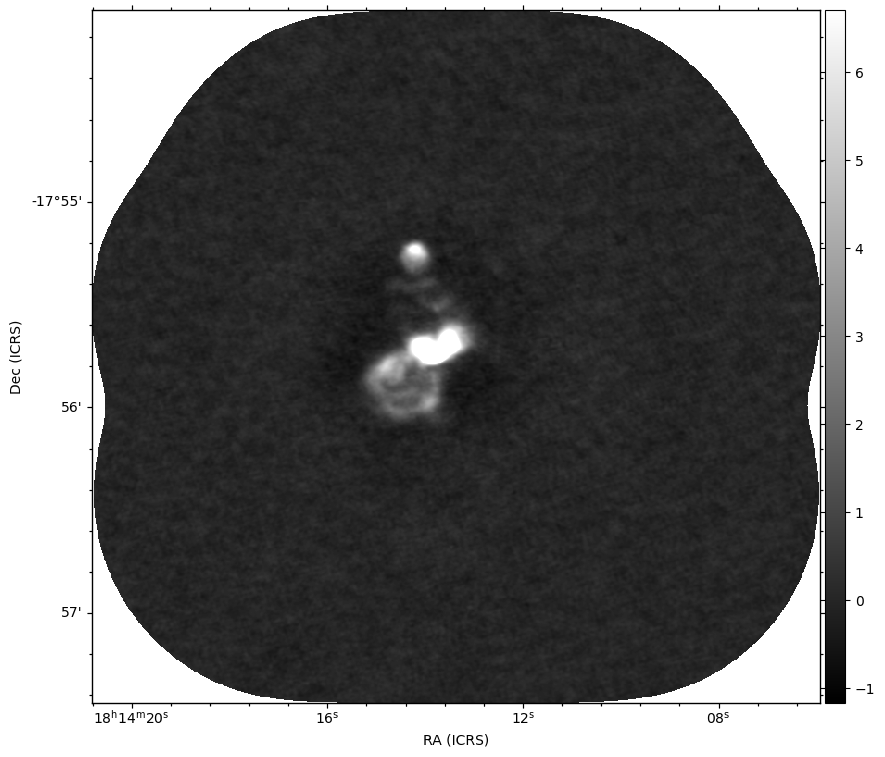

In [35]:
# Calculate moment 0 of cube and pixel of maximum in moment 0
mom0_H41a = cube_H41a.moment0(axis=0)
mom0_H41a.quicklook()
max_mom0 = np.unravel_index(np.nanargmax(mom0_H41a), mom0_H41a.shape)
print(max_mom0) # Note that this gives (y,x)

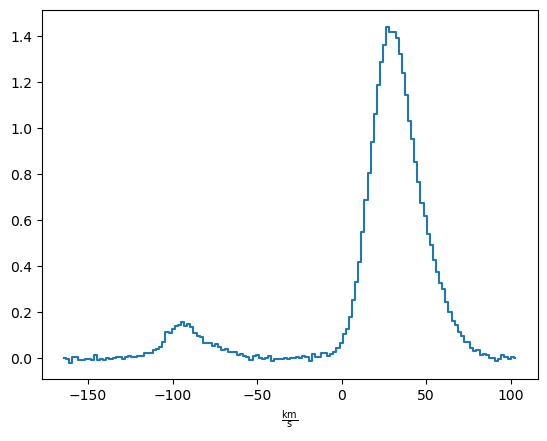

In [40]:
# Show spectrum at the pixel of maximum integrated emission 
cube_H41a[:,max_mom0[0],max_mom0[1]].quicklook() # (z,y,x)

This function (<function BaseSpectralCube.mean at 0x7fc3d2d82d40>) requires loading the entire cube into memory and may therefore be slow.


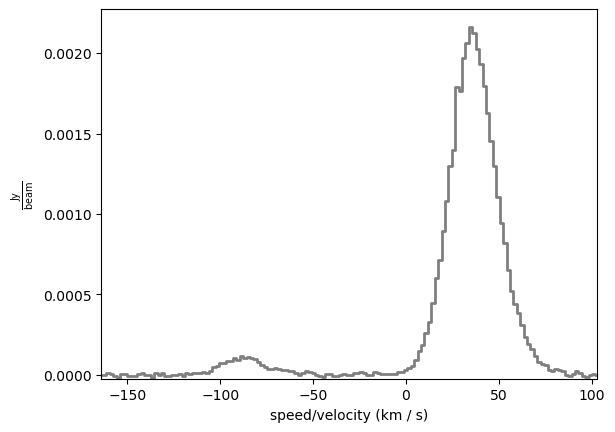

In [61]:
avg_cube = cube_H41a.mean(axis=(1,2))
sp_cube = Spectrum(data=avg_cube, xarr=cube_H41a.spectral_axis, unit=u.Jy/u.beam)
sp_cube.plotter(clear=True, ymax=1.05*sp_cube.data.max(), linewidth=2, alpha=0.5)

In [90]:
# Initial guesses for spectrum fit
#H
amp_guess_H = sp_cube.data.max()
center_guess_H =  avg_cube.spectral_axis[np.argmax(avg_cube)].value
width_guess_H = 20.0
#He
amp_guess_He = amp_guess_H*0.1
center_guess_He = center_guess_H + dV_He41a.to('km/s').value
width_guess_He = width_guess_H
guesses = [amp_guess_H, center_guess_H, width_guess_H, amp_guess_He, center_guess_He, width_guess_He]

In [93]:
# Do the fitting twice. First with initial guesses, then with first results
sp_cube.specfit.multifit(fittype='gaussian', guesses=guesses)
sp_cube.specfit.multifit(fittype='gaussian', guesses=sp_cube.specfit.parinfo.values)

In [97]:
#Save results to convenient variable name:
fit_results = sp_cube.specfit.parinfo.values
fit_errors = sp_cube.specfit.parinfo.errors
reduced_chi2 = sp_cube.specfit.chi2/sp_cube.specfit.dof
# Check out the results
print('Fitted values are:')
print(fit_results)
print('Fitted errors are:')
print(fit_errors)
print('Reduced chi2 is:')
print(reduced_chi2)

Fitted values are:
[0.0020837682952153927, 35.87514144847277, 12.451118939232163, 0.0001061021900442848, -87.8417219594124, 11.680992253843256]
Fitted errors are:
[1.0061451883759326e-05, 0.06942069798113534, 0.06942069844447601, 1.0387830679611208e-05, 1.3205351283433984, 1.3205351359336455]
Reduced chi2 is:
1.0650194567716478


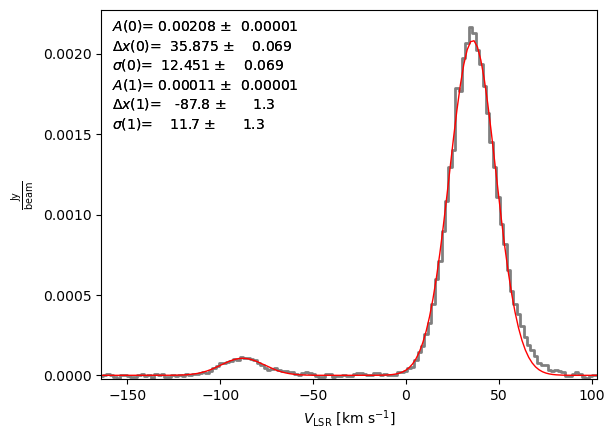

In [111]:
#Plot data and fit
sp_cube.plotter(clear=True, ymax=1.05*amp_guess_H, linewidth=2, alpha=0.5)
sp_cube.specfit.plot_fit(annotate=True, show_components=False, lw=1, alpha=0.5)
sp_cube.specfit.annotate(loc='upper left')
sp_cube.plotter.label(xlabel=r'$V_\mathrm{LSR}$ [km s$^{-1}$]')
ylabel= 'Average intensity [Jy/beam]'
outfig_fit = path.join(data_path,'H_He_41a_fit.png')

In [112]:
#sp_cube.specfit.plotresiduals(axis=ax, linewidth=1)